# pyCAT

## Picat language model implementation in metaL/Python

github: https://github.com/ponyatov/pycat

Jupyter notebook render: https://nbviewer.jupyter.org/github/ponyatov/pycat/blob/master/pycat.ipynb

This manual is about learning Picat programming language by reimplementing it yourself from scratch. 

This method is not for a total newbie in programming as you must know Python a bit to start, and have some entry-level programming skills. The Python was selected as it is the most popular programming language now for programming learning, and because this language implementation is so dynamic, as you can implement your own language system atop of PVM runtime. The advantage of learning by reimplementing is you are able not only embed this scripting engine to any software system you are doing but also deeply understand the original Picat.

But it is not the end as this Picat implementation uses not pure Python but the `metaL`: homoiconic hypergraph model written itself in Python -- *executable data structure (EDS)* built from some sort of Marvin Minsky frames [minsky]. It was mostly selected to make this language to be not visual but **visualizable**: it is important for the newbies that a learning programming system to be Smalltalk-like interactive and deeply researchable.

### MIT License

Copyright (c) 2019 Dmitry Ponyatov <<dponyatov@gmail.com>>

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice (including the next paragraph) shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

## Install

```sh
      ~$ git clone -o gh https://github.com/ponyatov/pycat ; cd pycat
~/pycat$ make install
```

### Run

```sh
~/pycat$ .bin/activate
 (venv)$ jupyter notebook pycat.ipynb &
```

# Links

* [A Framework for Representing Knowledge](https://courses.media.mit.edu/2004spring/mas966/Minsky%201974%20Framework%20for%20knowledge.pdf) (c) Marvin Minsky, 1974
  * [Фреймы для представления знаний](https://royallib.com/book/minskiy_marvin/freymi_dlya_predstavleniya_znaniy.html) (c) Марвин Минский, М.: Мир, 1979

* **Programming Python, 4th Edition** (c) Mark Lutz, O'Reilly 2019
  * [Изучаем Python. Том 1](https://www.ozon.ru/context/detail/id/156082566/) (c) Марк Лутц, М.: Вильямс, 2019


### Picat language

* [Picat Google group](https://groups.google.com/forum/#!forum/picat-lang)
  * http://picat-lang.org/
    * [Constraint Solving and Planning with Picat](http://picat-lang.org/picatbook2015.html) (c) Neng-Fa Zhou, Håkan Kjellerstrand, Jonathan Fruhman

* [Picat code samples](https://github.com/claudiosa/CCS/tree/master/picat) (c) Claudio Cesar

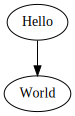

In [4]:
import graphviz
viz = graphviz.Digraph()
viz.edge('Hello','World')
viz